In [15]:
import pandas as pd
from datetime import datetime


In [57]:
# Carregar os dados do arquivo .txt
arquivo_txt = "C:\\Users\\alysson.assis\\OneDrive - ARAXA\\Documentos\\Tópicos especiais-Python in Environmental Applications\\2748013_Chuvas_mod.txt"  # nome do arquivo de entrada
df = pd.read_csv(arquivo_txt, delimiter=';')

#df = df.drop(columns=['coluna', 'coluna2'], inplace=True)
#df=df['Data']
novo_df = df[['Data', 'Maxima']]
# Substituir vírgulas por pontos
novo_df['Maxima'] = df['Maxima'].str.replace(',', '.')
# Converter para float
novo_df['Maxima'] = novo_df['Maxima'].astype(float)
novo_df.describe()

C:\Users\alysson.assis\AppData\Local\Temp\ipykernel_24052\1145516960.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo_df['Maxima'] = df['Maxima'].str.replace(',', '.')
C:\Users\alysson.assis\AppData\Local\Temp\ipykernel_24052\1145516960.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo_df['Maxima'] = novo_df['Maxima'].astype(float)


,Maxima
count,137.000000
mean,45.964964
std,33.626953
min,7.000000
25%,23.000000
50%,37.700000
75%,53.900000
max,204.600000


In [59]:
mean = novo_df['Maxima'].mean()
std = novo_df['Maxima'].std()
number_elements = len(novo_df['Maxima'])
print('mean',mean)
print('std', std)
print('number_elements', number_elements)

mean 45.964963503649635
std 33.62695345570118
number_elements 137


In [60]:
#!pip install matplotlib

In [64]:
# Filtrando dados válidos de SO2, para a estação BA_010.
novo_df = novo_df.loc[
    (novo_df['Data'] >= '01/06/82') # Filtrando apenas dados após anos 80
]

In [65]:
novo_df

,Data,Maxima
5,01/12/1981,39.6
6,01/11/1981,23.2
7,01/10/1981,36.3
8,01/09/1981,15.6
9,01/08/1981,27.7
...,...,...
126,01/11/1971,73.4
127,01/10/1971,16.4
128,01/09/1971,37.2
129,01/08/1971,16.3


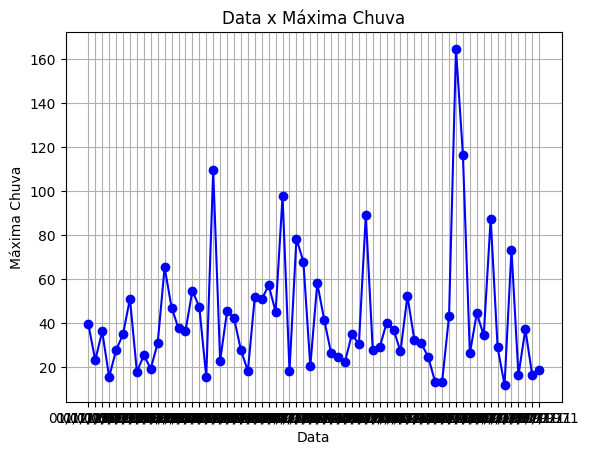

In [66]:
import matplotlib.pyplot as plt

# Dados de exemplo
x = novo_df['Data'].tolist()
y = novo_df['Maxima'].tolist()

# Criar o gráfico de linhas
plt.plot(x, y, marker='o', linestyle='-', color='b')

# Títulos e rótulos
plt.title('Data x Máxima Chuva')
plt.xlabel('Data')
plt.ylabel('Máxima Chuva')

# Exibir o gráfico
plt.grid(True)  # Adicionar grades ao gráfico
plt.show()


In [ ]:
# Importando patches para adicionar item de legenda
import matplotlib.patches as mpatches

# Potando dados válidos e adicionando o eixo de plotagem a uma variável
ax = novo_df['Data'].plot(ylabel='Concentração de SO2')

# Plotando a área do desvio padrão
mean = filtred_so2_df['Valor'].mean()
std = filtred_so2_df['Valor'].std()
number_elements = len(filtred_so2_df['Valor'])

ax.fill_between(
    filtred_so2_df.index, number_elements * [mean - std], number_elements * [mean + std],
    color='green', alpha=.2)

# Pegando um valor médio
mean_df = filtred_so2_df[['Valor']].copy()
mean_df.loc[:, 'Mean'] = mean
mean_df = mean_df[['Mean']]
mean_df.plot(ax=ax)

# Adicionando Standard Deviation na legenda
std_legend = mpatches.Patch(color='green', alpha=.2)
handles, labels = ax.get_legend_handles_labels()
handles.append(std_legend)
labels.append('Standard Deviation')
ax.legend(handles, labels)

In [29]:
# Filtrando dados válidos de SO2, para a estação BA_010.
# Para tornar didática a visualização, vamos manter somente valores abaixo de 150
filtred_df = df.loc[
    (df['Data'] == 'Data') & # Filtrando apenas poluentes em SO2
    (df['Maxima'] == 'Maxima')] # Filtrando apenas poluentes em SO2]
#    (df['Valor'] >= 0) &         # Filtrando apenas valores maiores que 0
#    (df['Valor'] <= 150)         # Filtrando apenas valores menores que 150, para fins didáticos
#]

# Formatando data e adicionando ao índice
#filtred_so2_df.loc[:, 'Date'] = df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].apply(lambda x: datetime(x['Ano'], x['Mes'], x['Dia'], x['Hora'], x['Minuto']), axis=1)

# Colocando a coluna "Data" como índice
#filtred_df = filtred_df.set_index('Data')

# Selecionando somente os dados importantes para minha análise
filtred_df = filtred_df[['Data', 'Maxima']]
filtred_df

,Data,Maxima


In [13]:
# Obtendo estatísticas
filtred_so2_df.describe()

NameError: name 'filtred_so2_df' is not defined

In [14]:
!pip install matplotlib

     ---------------------------------------- 7.8/7.8 MB 2.2 MB/s eta 0:00:00
     -------------------------------------- 216.0/216.0 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 55.9/55.9 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 104.1/104.1 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 1.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Importando patches para adicionar item de legenda
import matplotlib.patches as mpatches

# Potando dados válidos e adicionando o eixo de plotagem a uma variável
ax = filtred_so2_df['Valor'].plot(ylabel='Concentração de SO2')

# Plotando a área do desvio padrão
mean = filtred_so2_df['Valor'].mean()
std = filtred_so2_df['Valor'].std()
number_elements = len(filtred_so2_df['Valor'])

ax.fill_between(
    filtred_so2_df.index, number_elements * [mean - std], number_elements * [mean + std],
    color='green', alpha=.2)

# Pegando um valor médio
mean_df = filtred_so2_df[['Valor']].copy()
mean_df.loc[:, 'Mean'] = mean
mean_df = mean_df[['Mean']]
mean_df.plot(ax=ax)

# Adicionando Standard Deviation na legenda
std_legend = mpatches.Patch(color='green', alpha=.2)
handles, labels = ax.get_legend_handles_labels()
handles.append(std_legend)
labels.append('Standard Deviation')
ax.legend(handles, labels)